In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

In [2]:
dFrame = pd.read_csv('clusteredx17LLM.csv')
quakeRecArr  = dFrame.to_records(index=False)
clustered17LLM = np.array(quakeRecArr.tolist()) #either a dont delete it or adaptfurther down.

In [3]:
colour = clustered17LLM[:,3]
colour

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2.,
       0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 0., 3.,
       0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0.,
       0., 2., 2., 3., 2., 2., 0., 0., 0., 0., 1., 0., 2., 0., 0., 1., 3.,
       1., 0., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 3., 3.,
       3., 3., 2., 2., 0., 0., 0., 1., 3., 0., 0., 3., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 3., 0., 3., 0., 0., 0., 0., 0., 1., 0., 3., 3., 3.,
       3., 0., 2., 1., 1.

In [4]:
colors = {'0':'red', '1':'blue', '2':'green', '3':'black'}

In [5]:
clustered17LLM[:,3]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2.,
       0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 0., 3.,
       0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0.,
       0., 2., 2., 3., 2., 2., 0., 0., 0., 0., 1., 0., 2., 0., 0., 1., 3.,
       1., 0., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 3., 3.,
       3., 3., 2., 2., 0., 0., 0., 1., 3., 0., 0., 3., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 3., 0., 3., 0., 0., 0., 0., 0., 1., 0., 3., 3., 3.,
       3., 0., 2., 1., 1.

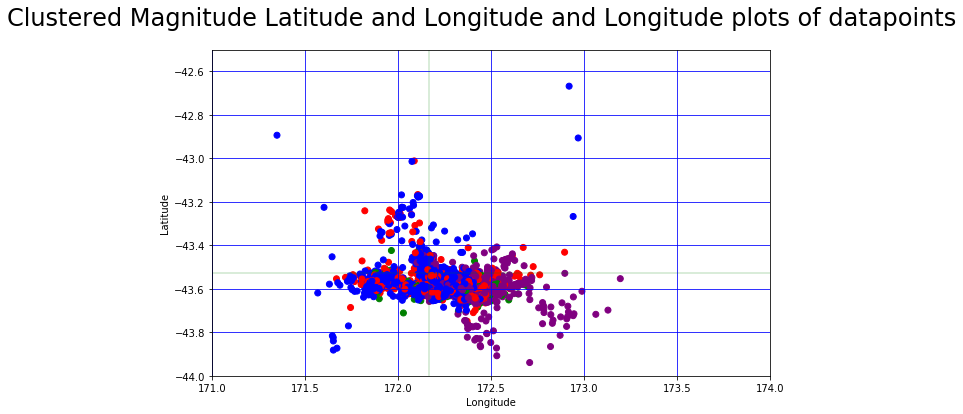

In [6]:
def plotPos(datTable):  
    
    figure = plot.figure()
    
    myDf = pd.DataFrame(dict(long=datTable[:,0], lat=datTable[:,1], clusters=datTable[:,3]))
    
    
    ax = figure.add_subplot(111)
    plot.suptitle('Clustered Magnitude Latitude and Longitude and Longitude plots of datapoints', fontsize=24)
    
    colorClust = {0:'red', 1:'blue', 2:'green', 3:'purple'}
    #red: cluster 1
    #blue: cluster 2
    #green: cluster 3
    #purple: cluster 5
    
    
    ax.scatter(myDf['long'],
            myDf['lat'], 
            c=myDf['clusters'].apply(lambda x: colorClust[x]))
    
    
    figure.set_size_inches(10,6)
    
    plot.xlim(171, 174)
    plot.ylim(-44, -42.5)
    
    #FInd that Bloody Outlier
    #plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    #plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    #the Epicenter
    plot.axvline(x=172.16794, color = 'green', alpha=0.2, markersize=2)
    plot.axhline(y=-43.52731, color = 'green', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid(c='blue')
    plot.show()
    
    #plot points
    
plotPos(clustered17LLM )

In [7]:
#ok so clearly that was not very meaningful so I thin what would be better is if you just make multiple subplots. 4 subplots

#longitude latitude

In [8]:
#they must have regarded it as the name?

In [9]:
clustered17LLM

array([[172.16794, -43.52731,   7.2    ,   2.     ],
       [172.32367, -43.55426,   5.815  ,   2.     ],
       [172.38512, -43.6585 ,   5.114  ,   2.     ],
       [172.29477, -43.5661 ,   5.532  ,   2.     ],
       [172.18575, -43.4711 ,   5.434  ,   2.     ],
       [172.11847, -43.49201,   5.162  ,   2.     ],
       [172.11028, -43.62283,   5.335  ,   2.     ],
       [172.21217, -43.59541,   4.921  ,   2.     ],
       [172.4296 , -43.68362,   4.565  ,   2.     ],
       [172.54439, -43.58787,   4.75   ,   2.     ],
       [172.30362, -43.58586,   4.971  ,   2.     ],
       [172.37521, -43.66354,   4.822  ,   2.     ],
       [172.23647, -43.64153,   4.945  ,   2.     ],
       [172.27835, -43.63268,   4.912  ,   2.     ],
       [172.41315, -43.60732,   4.979  ,   2.     ],
       [172.16673, -43.60926,   5.144  ,   2.     ],
       [172.27443, -43.61766,   4.569  ,   2.     ],
       [172.40707, -43.64999,   4.491  ,   2.     ],
       [172.16286, -43.46124,   5.359  ,   2. 

In [10]:
clusterZ = np.empty((871,4), dtype=float)
clusterOne = np.empty((1163,4), dtype=float)
clusterTwo = np.empty((346,4), dtype=float)
clusterThree = np.empty((910,4), dtype=float)

In [11]:
#extract Clusters 
#if column = 2 then plot
#with open("1717cluster2.csv",'ab') as file:

#cluster 0 has : 871
#cluster 1 has : 1163
#cluster 2 has : 346
#cluster 3 has : 910

#these are just counters
nPC0 = 0
nPC1 = 0
nPC2 = 0
nPC3 = 0

#do me a favour bro and count how many in each cluster? Refer x17 page
print("\n")
#cluster 0
for t in range(0, len(clustered17LLM)):
    if(clustered17LLM[t][3] == 0): #if the data index
        print(str(nPC0) + " " + "Data Index: " + str(t) +  " " +  str(clustered17LLM[t])) #these are all cluster 2 the clusters that the magnitude belong to cluster 2 plot these
        clusterZ[nPC0] = clustered17LLM[t]
        nPC0 += 1 

print("\n")
#cluster 1
for t in range(0, len(clustered17LLM)):
    if(clustered17LLM[t][3] == 1): #if the data index
        print(str(nPC1) + " " + "Data Index: " + str(t) +  " " +  str(clustered17LLM[t])) #these are all cluster 2 the clusters that the magnitude belong to cluster 2 plot these
        clusterOne[nPC1] = clustered17LLM[t]
        nPC1 += 1 

print("\n")
#cluster 2
for t in range(0, len(clustered17LLM)):
    if(clustered17LLM[t][3] == 2): #if the data index
        print(str(nPC2) + " " + "Data Index: " + str(t) +  " " +  str(clustered17LLM[t])) #these are all cluster 2 the clusters that the magnitude belong to cluster 2 plot these
        clusterTwo[nPC2] = clustered17LLM[t]
        nPC2 += 1  

print("\n")
#cluster 3
for t in range(0, len(clustered17LLM)):
    if(clustered17LLM[t][3] == 3): #if the data index
        print(str(nPC3) + " " + "Data Index: " + str(t) +  " " +  str(clustered17LLM[t])) #these are all cluster 2 the clusters that the magnitude belong to cluster 2 plot these
        clusterThree[nPC3] = clustered17LLM[t]
        nPC3 += 1  



0 Data Index: 47 [172.37834 -43.41101   3.564     0.     ]
1 Data Index: 50 [172.43463 -43.63962   3.587     0.     ]
2 Data Index: 51 [172.32454 -43.59659   3.547     0.     ]
3 Data Index: 60 [172.35083 -43.58913   3.412     0.     ]
4 Data Index: 66 [172.41945 -43.64859   3.596     0.     ]
5 Data Index: 67 [172.3445  -43.58962   3.282     0.     ]
6 Data Index: 88 [172.21379 -43.63201   3.455     0.     ]
7 Data Index: 90 [172.39746 -43.58581   3.29      0.     ]
8 Data Index: 95 [172.15215 -43.50172   3.506     0.     ]
9 Data Index: 97 [172.31989 -43.63719   3.619     0.     ]
10 Data Index: 99 [172.31593 -43.56948   3.533     0.     ]
11 Data Index: 102 [172.16052 -43.58697   3.498     0.     ]
12 Data Index: 107 [172.1881 -43.5922   3.432    0.    ]
13 Data Index: 108 [172.00301 -43.51379   3.141     0.     ]
14 Data Index: 109 [171.94992 -43.47793   3.341     0.     ]
15 Data Index: 116 [172.34909 -43.64157   3.445     0.     ]
16 Data Index: 117 [172.1776  -43.48444   3.531

120 Data Index: 734 [172.2746  -43.57844   2.806     1.     ]
121 Data Index: 736 [172.04422 -43.60038   2.633     1.     ]
122 Data Index: 740 [172.00414 -43.5691    2.628     1.     ]
123 Data Index: 744 [171.91019 -43.55082   2.638     1.     ]
124 Data Index: 748 [172.32619 -43.62144   2.629     1.     ]
125 Data Index: 750 [172.25613 -43.5961    2.535     1.     ]
126 Data Index: 751 [172.24699 -43.58549   2.754     1.     ]
127 Data Index: 753 [172.30138 -43.66826   2.686     1.     ]
128 Data Index: 754 [172.13419 -43.55625   2.612     1.     ]
129 Data Index: 758 [172.16286 -43.52803   2.669     1.     ]
130 Data Index: 759 [171.86462 -43.53455   2.531     1.     ]
131 Data Index: 760 [172.20306 -43.54866   2.719     1.     ]
132 Data Index: 772 [171.8304  -43.57887   2.86      1.     ]
133 Data Index: 778 [172.35217 -43.58854   2.766     1.     ]
134 Data Index: 782 [172.17439 -43.54096   2.909     1.     ]
135 Data Index: 795 [172.38016 -43.5721    2.691     1.     ]
136 Data

1047 Data Index: 3033 [171.86006 -43.58574   2.849     1.     ]
1048 Data Index: 3034 [172.32228 -43.59495   2.594     1.     ]
1049 Data Index: 3035 [171.84056 -43.61299   3.112     1.     ]
1050 Data Index: 3036 [172.23004 -43.59855   2.527     1.     ]
1051 Data Index: 3038 [172.11551 -43.17266   3.37      1.     ]
1052 Data Index: 3040 [171.84103 -43.61463   2.907     1.     ]
1053 Data Index: 3041 [172.21056 -43.60815   2.577     1.     ]
1054 Data Index: 3042 [172.10938 -43.17824   2.859     1.     ]
1055 Data Index: 3044 [171.94965 -43.53838   2.495     1.     ]
1056 Data Index: 3050 [172.37251 -43.59733   2.464     1.     ]
1057 Data Index: 3057 [172.00967 -43.26625   2.932     1.     ]
1058 Data Index: 3061 [172.22554 -43.62795   2.523     1.     ]
1059 Data Index: 3064 [172.11096 -43.17453   2.594     1.     ]
1060 Data Index: 3066 [172.12566 -43.47596   2.619     1.     ]
1061 Data Index: 3067 [172.13974 -43.61064   2.697     1.     ]
1062 Data Index: 3068 [172.01907 -43.564

454 Data Index: 1844 [172.6024  -43.58041   3.082     3.     ]
455 Data Index: 1847 [172.43886 -43.65248   2.605     3.     ]
456 Data Index: 1848 [172.94716 -43.71476   2.807     3.     ]
457 Data Index: 1849 [172.91724 -43.70629   2.922     3.     ]
458 Data Index: 1852 [172.42043 -43.82941   2.777     3.     ]
459 Data Index: 1856 [172.58916 -43.5713    2.785     3.     ]
460 Data Index: 1860 [172.47723 -43.80473   3.169     3.     ]
461 Data Index: 1861 [172.35051 -43.58738   2.82      3.     ]
462 Data Index: 1862 [172.66583 -43.57915   3.013     3.     ]
463 Data Index: 1865 [172.72066 -43.54805   2.894     3.     ]
464 Data Index: 1867 [172.231   -43.61035   2.832     3.     ]
465 Data Index: 1869 [172.2818  -43.61408   2.916     3.     ]
466 Data Index: 1870 [172.64108 -43.57646   3.203     3.     ]
467 Data Index: 1871 [172.43382 -43.63728   2.802     3.     ]
468 Data Index: 1875 [172.56996 -43.57947   3.119     3.     ]
469 Data Index: 1877 [172.39639 -43.54146   2.802     3

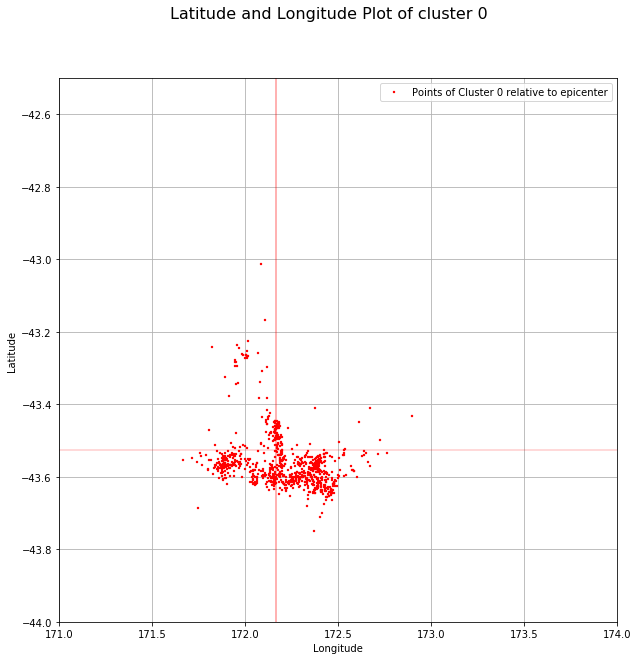

In [12]:
def plotPos(datTable):  
    
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Latitude and Longitude Plot of cluster 0', fontsize=16)
    ax.plot(datTable[:,0], datTable[:,1], 
            '+', 
            ms=2.2,     #marker size
            mew = 2.2, 
            c='red' , 
            alpha = 8.0,)
    
    ax.legend(['Points of Cluster 0 relative to epicenter'])
    figure.set_size_inches(10,10)
    
    plot.xlim(171, 174)
    plot.ylim(-44, -42.5)
    
    #Find that Bloody Outlier
    #plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    #plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    #epicenter
    plot.axvline(x=172.16794, color = 'red', alpha=0.4, markersize=2)
    plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid()
    plot.show()
    
    #plot points
    
plotPos(clusterZ)

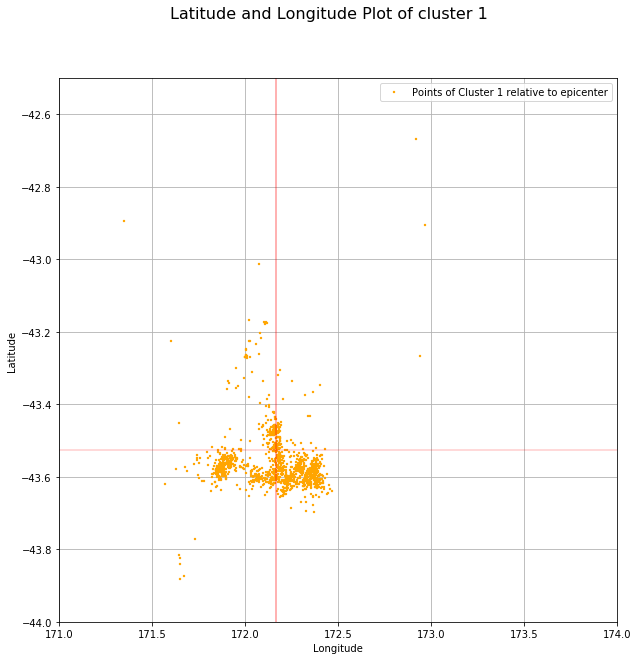

In [18]:
def plotPos(datTable):  
    
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Latitude and Longitude Plot of cluster 1', fontsize=16)
    ax.plot(datTable[:,0], datTable[:,1], 
            '+', 
            ms=2.2,     #marker size
            mew = 2.2, 
            c='orange' , 
            alpha = 8.0,)
    
    ax.legend(['Points of Cluster 1 relative to epicenter'])
    figure.set_size_inches(10,10)
    
    plot.xlim(171, 174)
    plot.ylim(-44, -42.5)
    
    #Find that Bloody Outlier
    #plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    #plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    #epicenter
    plot.axvline(x=172.16794, color = 'red', alpha=0.4, markersize=2)
    plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid()
    plot.show()
    
    #plot points
    
plotPos(clusterOne)

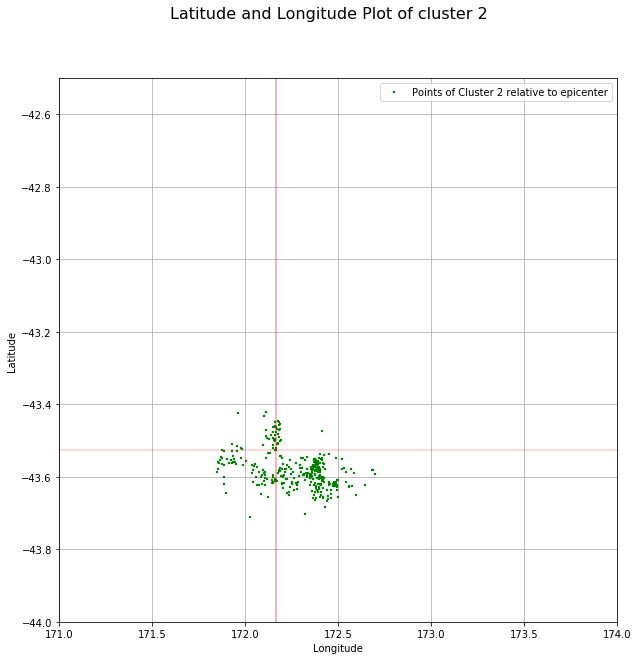

In [21]:
def plotPos(datTable):  
    
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Latitude and Longitude Plot of cluster 2', fontsize=16)
    ax.plot(datTable[:,0], datTable[:,1], 
            '+', 
            ms=2.2,     #marker size
            mew = 2.2, 
            c='green' ,  
            alpha = 8.0)
    
    ax.legend(['Points of Cluster 2 relative to epicenter'])
    figure.set_size_inches(10,10)
    
    plot.xlim(171, 174)
    plot.ylim(-44, -42.5)
    
    #Find that Bloody Outlier
    #plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    #plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    #epicenter
    plot.axvline(x=172.16794, color = 'red', alpha=0.4, markersize=2)
    plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid()
    plot.show()
    
    #plot points
    
plotPos(clusterTwo) #

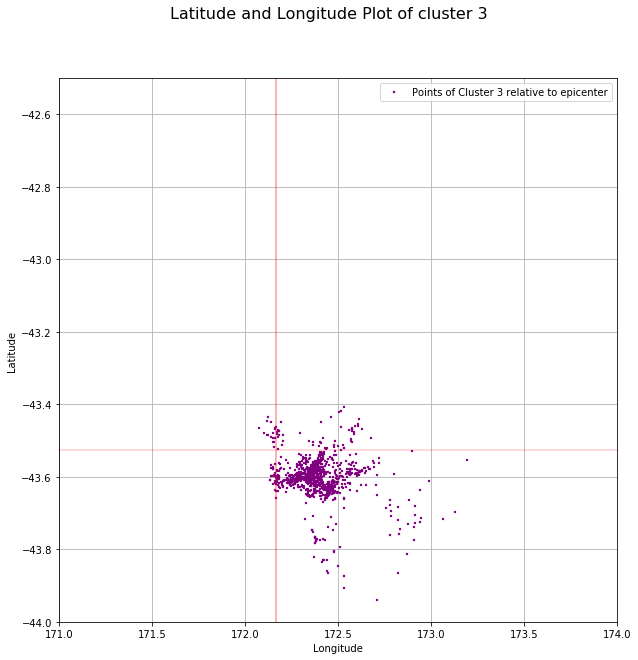

In [20]:
def plotPos(datTable):  
    
    figure = plot.figure()
    ax = figure.add_subplot(111)
    plot.suptitle('Latitude and Longitude Plot of cluster 3', fontsize=16)
    ax.plot(datTable[:,0], datTable[:,1], 
            '+', 
            ms=2.2,     #marker size
            mew = 2.2,
            c='purple' , 
            alpha = 8.0,)
    
    figure.set_size_inches(10,10)
    ax.legend(['Points of Cluster 3 relative to epicenter'])
    plot.xlim(171, 174)
    plot.ylim(-44, -42.5)
    
    #Find that Bloody Outlier
    #plot.axvline(x=172.925, color = 'red', alpha=0.2, markersize=2)
    #plot.axhline(y=-42.673, color = 'red', alpha=0.2, markersize=2)
    
    #epicenter
    plot.axvline(x=172.16794, color = 'red', alpha=0.4, markersize=2)
    plot.axhline(y=-43.52731, color = 'red', alpha=0.2, markersize=2)
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plot.grid()
    plot.show()
    
    #plot points
    
plotPos(clusterThree) #no epicenter here

In [16]:
clusterThree

array([[172.20988, -43.57866,   3.099  ,   3.     ],
       [172.24127, -43.59666,   2.891  ,   3.     ],
       [172.17863, -43.60236,   2.853  ,   3.     ],
       [172.78311, -43.67744,   3.511  ,   3.     ],
       [172.23175, -43.5606 ,   3.105  ,   3.     ],
       [172.38969, -43.629  ,   3.006  ,   3.     ],
       [172.15208, -43.57822,   2.951  ,   3.     ],
       [172.1759 , -43.47049,   2.907  ,   3.     ],
       [172.36519, -43.58719,   2.909  ,   3.     ],
       [172.24591, -43.61634,   2.842  ,   3.     ],
       [172.38414, -43.58119,   3.058  ,   3.     ],
       [172.47163, -43.63888,   3.003  ,   3.     ],
       [172.29262, -43.58553,   3.007  ,   3.     ],
       [172.18323, -43.62764,   3.072  ,   3.     ],
       [172.3454 , -43.59164,   2.966  ,   3.     ],
       [172.52646, -43.51237,   3.06   ,   3.     ],
       [172.18999, -43.56454,   3.127  ,   3.     ],
       [172.40489, -43.50297,   3.063  ,   3.     ],
       [172.36053, -43.62069,   2.786  ,   3. 